# scikit-eLCS Complete User Guide

Author: Robert Zhang - University of Pennsylvania, B.S.E Computer Science, B.S.E. Economics (SEAS '22, WH '22)

Advisor: Ryan Urbanowicz, PhD - University of Pennsylvania, Department of Biostatics, Epidemiology, and Informatics & Institue for Biomedical Informatics (IBI)

Date: 02/24/2020

Package Requirements: (Python 3)
<ul>
    <li>pandas</li>
    <li>numpy</li>
    <li>scikit-learn</li>
</ul>

Notebook Requirements:
<ul>
    <li>scikit-eLCS</li>
    <li>scikit-learn</li>
    <li>pandas</li>
    <li>mathplotlib</li>
</ul>

## Introduction

This notebook presents a complete user guide to the core sklearn-compatible scikit-eLCS package as well as auxilliary helper objects included in the package. eLCS is a supervised learning variant of the Learning Classifier System. In general, Learning Classifier Systems (LCSs) are a classification of Rule Based Machine Learning Algorithms that have been shown to perform well on problems involving high amounts of heterogeneity and epistasis. Well designed LCSs are also highly human interpretable. LCS variants have been shown to adeptly handle supervised and reinforced, classification and regression, online and offline learning problems, as well as missing or unbalanced data. These characteristics of versatility and interpretability give LCSs a wide range of potential applications, notably those in biomedicine. This package is still under active development and we encourage you to check back on this repository for updates.

eLCS, or Educational Learning Classifier System, implements the core components of a Michigan-Style Learning Classifier System (where the system's genetic algorithm operates on a rule level, evolving a population of rules with each their own parameters) in an easy to understand way, while still being highly functional in solving ML problems.

While Learning Classifier Systems are commonly applied to genetic analyses, where epistatis (i.e. feature interactions) is common, the eLCS algorithm implemented in this package can be applied to almost any supervised classification data set and supports:

<ul>
    <li>Feature sets that are discrete/categorical, continuous-valued or a mix of both</li>
    <li>Data with missing values</li>
    <li>Binary Classification Problems (Binary Endpoints)</li>
    <li>Multi-class Classification Problems (Multi-class Endpoints)</li>
</ul>

It is important to mention that the eLCS package does not currently support regression problems (continuous endpoints). Regression functionality is built into the package. However, we have decided to disable it for this version, since eLCS performs best on purely classification problems.

## Notebook Organization

**Part 1: Loading Data**
<ul>
    <li> Dataset format requirements for scikit-eLCS</li>
    <li> Method 1: Loading data using pandas</li>
    <li> Method 2: Loading data using StringEnumerator (additional data loading/transformation tool provided by eLCS package)</li>
</ul>

**Part 2: Initializing eLCS Estimator Object**
<ul>
    <li> Basic Initialization</li>
    <li> Overview of all scikit-eLCS initialization parameters and default values</li>
</ul>

**Part 3: Model Training and Testing**
<ul>
    <li> model.fit(X,y) and how it works</li>
    <li> model.predict(X), model.predict_proba(X)</li>
    <li> model Cross Validation and Scoring</li>
    <li> ROC/PRC curves and AUC</li>
    <li> Auxilliary scikit-eLCS methods
</ul>

**Part 4: Data Collection and Export**
<ul>
    <li> trackingAccuracyWhileFit and other tracking metrics</li>
    <li> Exporting and Accessing Iteration Tracking Data </li>
    <li> Exporting and Accessing Rule Population Data </li>
</ul>

**Part 5: Population Reboot**


## Part 1: Loading Data

### Dataset Format Requirement for scikit-eLCS

There are 4 requirements for the dataset:
<ul>
    <li>Data Attributes for all data instances are represented by an <b>nxm</b> numpy.ndarray, where <b>n</b> = # of instances and <b>m</b> = # of attributes for each instance</li>
    <li>Data Phenotypes for all data instances are represented by a 1 dimensional numpy.ndarray of length <b>n</b></li>
    <li>Both the <b>nxm</b> attribute array and the length <b>n</b> phenotype array are fully numeric. This means that every element in each array must be convertable to a float. String, boolean types are not permitted (of course, boolean datasets can be represented by binary 0s and 1s). It is important to mention that missing data in the attribute dataset is acceptable, if represented as a NaN type within the array. Missing data in the phenotype array is not acceptable.</li>
    <li>As mentioned aboved, the problem must be a classification problem. This version does not support regression problems.</li>
</ul>

The package includes automated parameter checking that will raise an Exception at the start of training if the dataset does not meet the above requirements.

Below, we present 2 methods to load data of the correct format for the eLCS model. The first is the commonly used pandas. The second is a custom, standalone method included with this package named StringEnumerator, that will make your life much easier in terms of ensuring data formatting requirements are met for the eLCS model.

### Loading Data Method 1: Using pandas

There are many ways you can derive the attribute and phenotype array. One most common method is by using pandas via reading from a csv file, as the below code demonstrates with the a 6 bit multiplexer dataset:

In [1]:
import pandas as pd

#Read from CSV file
data = pd.read_csv("test/DataSets/Real/Multiplexer6.csv")

#Specify the dataset's phenotype label
classLabel = "class"

#Derive the attribute and phenotype array using the phenotype label
dataFeatures = data.drop(classLabel,axis = 1).values
dataPhenotypes = data[classLabel].values

#Optional: Retrieve the headers for each attribute as a length n array
dataHeaders = data.drop(classLabel,axis=1).columns.values

print("Data Features")
print(dataFeatures)
print("\nData Phenotypes")
print(dataPhenotypes)
print("\nData Headers")
print(dataHeaders)

Data Features
[[0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]
 [0 0 0 1 1 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 1]
 [0 0 1 0 1 0]
 [0 0 1 0 1 1]
 [0 0 1 1 0 0]
 [0 0 1 1 0 1]
 [0 0 1 1 1 0]
 [0 0 1 1 1 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 1]
 [0 1 0 0 1 0]
 [0 1 0 0 1 1]
 [0 1 0 1 0 0]
 [0 1 0 1 0 1]
 [0 1 0 1 1 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [0 1 1 0 0 1]
 [0 1 1 0 1 0]
 [0 1 1 0 1 1]
 [0 1 1 1 0 0]
 [0 1 1 1 0 1]
 [0 1 1 1 1 0]
 [0 1 1 1 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 1]
 [1 0 0 0 1 0]
 [1 0 0 0 1 1]
 [1 0 0 1 0 0]
 [1 0 0 1 0 1]
 [1 0 0 1 1 0]
 [1 0 0 1 1 1]
 [1 0 1 0 0 0]
 [1 0 1 0 0 1]
 [1 0 1 0 1 0]
 [1 0 1 0 1 1]
 [1 0 1 1 0 0]
 [1 0 1 1 0 1]
 [1 0 1 1 1 0]
 [1 0 1 1 1 1]
 [1 1 0 0 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 1 0]
 [1 1 0 0 1 1]
 [1 1 0 1 0 0]
 [1 1 0 1 0 1]
 [1 1 0 1 1 0]
 [1 1 0 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 1]
 [1 1 1 0 1 0]
 [1 1 1 0 1 1]
 [1 1 1 1 0 0]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]]

Data Phenotypes
[0 0 0 0

Below is another code snippet that uses the same method, but with a dataset that contains missing values. Note that all missing values must be represented as a NaN type when used in the scikit-eLCS model.

In [2]:
import pandas as pd

#Read from CSV file
data = pd.read_csv("test/DataSets/Tests/MissingFeatureData.csv")

#Specify the dataset's phenotype label
classLabel = "phenotype"

#Derive the attribute and phenotype array using the phenotype label
dataFeatures = data.drop(classLabel,axis = 1).values
dataPhenotypes = data[classLabel].values

#Optional: Retrieve the headers for each attribute as a length n array
dataHeaders = data.drop(classLabel,axis=1).columns.values

print("Data Features")
print(dataFeatures)
print("\nData Phenotypes")
print(dataPhenotypes)
print("\nData Headers")
print(dataHeaders)

Data Features
[[ 1. nan  1.  4.]
 [ 2.  0.  1. nan]
 [ 4. nan  1.  2.]
 [nan  1. nan  1.]
 [ 6. nan  1.  1.]]

Data Phenotypes
[1 0 1 0 1]

Data Headers
['N1' 'N2' 'N3' 'N4']


### Loading Data Method 2: Using StringEnumerator

Given the 4 requirements for the attribute and phenotype array, not all datasets necessarily satisfy those requirements. For example, a dataset may contain an attribute with values that are colors "red", "green", "blue". Since the scikit-eLCS model can only work with numeric data, this dataset would not meet the requirements. Alternatively, a dataset may, for some reason, have missing phenotype data. Since the scikit-eLCS model requires that the phenotype array is complete, this dataset would also not meet the requirements.

To make things more convenient, included in this package is an auxilliary data type called **String Enumerator** that makes it easy to transform datasets that do not meet the requirements into datasets that do.

For example, take the below dummy dataset:

In [3]:
import pandas as pd

#Read from CSV file
data = pd.read_csv("test/DataSets/Tests/StringData2.csv")

#Specify the dataset's phenotype label
classLabel = "phenotype"

#Derive the attribute and phenotype array using the phenotype label
dataFeatures = data.drop(classLabel,axis = 1).values
dataPhenotypes = data[classLabel].values

#Optional: Retrieve the headers for each attribute as a length n array
dataHeaders = data.drop(classLabel,axis=1).columns.values

print("Data Features")
print(dataFeatures)
print("\nData Phenotypes")
print(dataPhenotypes)
print("\nData Headers")
print(dataHeaders)

Data Features
[['male' 1.2 'young']
 ['female' 0.3 nan]
 ['female' -0.4 'old']
 [nan 0.0 'young']]

Data Phenotypes
['china' nan 'china' 'russia']

Data Headers
['N1' 'N2' 'N3']


This dummy dataset does not come close to meeting the dataset requirements for training. There exist many string types in the attribute and phenotype array, as well as missing phenotype data. Aside from not meeting the requirements, the data headers and phenotype label are not too descriptive. Below StringEnumerator cleans this up.

In [4]:
from skeLCS import StringEnumerator

#Initialize StringEnumerator object with csv filepath and class label.
converter = StringEnumerator("test/DataSets/Tests/StringData2.csv","phenotype")

#Change Header Names to be more descriptive using change_header_name(currentName,newName)
converter.change_header_name("N1","Gender")
converter.change_header_name("N2","Numeric")
converter.change_header_name("N3","Age")

#Change Phenotype Label to be more descriptive using change_class_name(newName)
converter.change_class_name("Country")

'''
Convert attributes to numeric data using either:
-add_attribute_converter_random(headerName):   Given an attribute name, randomly assigns each unique attribute value an
                                            integer value from 0 to n-1, where n = # of unique attribute values
                                            
-add_attribute_converter(headerName,array):   Given an attribute name, and an array of attribute values that will be
                                            converted, converter assigns each attribute value an integer value from
                                            0 to n-1 in the order of attribute values given in the array, where
                                            n = length of array. This can be useful for discrete attributes where the
                                            ordering of the attributes are important (ordinal values). For example,
                                            an attribute may have values "stage 1", "stage 2", "stage 3", "stage 4"
                                            to indicate stage of cancer, where the values are strings, but how they
                                            are enumerated is crucial.
'''
converter.add_attribute_converter_random("Gender")
converter.add_attribute_converter("Age",["old","young"])

'''
Convert phenotypes to numeric data using either
-add_class_converter(array)
-add_class_converter_random()
Same functionality as the attribute converters
'''
converter.add_class_converter_random()

'''
Convert all attributes using convert_all_attributes(). Note: this is NOT a standalone method. This method
just puts all of the changes made above "into stone". This method does not automatically convert anything for you. You
MUST call this method if data transformation operations were invoked (any of the class/attributeConverter methods
above), or you will not see any changes when you call get_params().
'''
converter.convert_all_attributes()

#Get arrays using get_params()
headers,classLabel,dataFeatures,dataPhenotypes = converter.get_params()

print("Data Features")
print(dataFeatures)
print("\nData Phenotypes")
print(dataPhenotypes)
print("\nData Headers")
print(headers)
print("\nClass Label")
print(classLabel)

Data Features
[[ 0.   1.2  1. ]
 [ 1.  -0.4  0. ]
 [ nan  0.   1. ]]

Data Phenotypes
[0. 0. 1.]

Data Headers
['Gender' 'Numeric' 'Age']

Class Label
Country


As you can see, the StringEnumerator mapped all string attributes and phenotypes into numeric types, deleted the instance that was missing phenotype data, and made the data headers and class label more descriptive. Now, the data features and phenotypes are ready for training.

The StringEnumerator has 2 additional methods not shown above that can also be powerful in data transformation:
<ul>
    <li>delete_attribute(headerName): deletes the specified attribute from all instances in the dataset</li>
    <li>delete_all_instances_without_header_data(headerName): there may be situations where you only want to use data instances that does not have missing data for a specific attribute. This method deletes all instances who's specified attribute is missing</li>
</ul>

Even if the dataset satisfies all requirements, StringEnumerator can be used as an easy way to get data in the correct format without needing to use pandas, as shown below:
    

In [5]:
converter = StringEnumerator("test/DataSets/Tests/MissingFeatureData.csv","phenotype")
headers,classLabel,dataFeatures,dataPhenotypes = converter.get_params()

print("Data Features")
print(dataFeatures)
print("\nData Phenotypes")
print(dataPhenotypes)
print("\nData Headers")
print(headers)

Data Features
[[ 1. nan  1.  4.]
 [ 2.  0.  1. nan]
 [ 4. nan  1.  2.]
 [nan  1. nan  1.]
 [ 6. nan  1.  1.]]

Data Phenotypes
[1. 0. 1. 0. 1.]

Data Headers
['N1' 'N2' 'N3' 'N4']


Finally, StringEnumerator contains a **print_invalid_attributes()** method that will print out the names of any attribute with invalid typed data (including the phenotype). This can help you identify which attributes need to converted.

In [6]:
converter = StringEnumerator("test/DataSets/Tests/StringData2.csv","phenotype")
converter.print_invalid_attributes()

ALL INVALID ATTRIBUTES & THEIR DISTINCT VALUES
N1: male	female	
N3: young	old	
phenotype (the phenotype): china	russia	


All in all, StringEnumerator makes loading data in the correct format easy. It is intuitive to use, and if any invalid operation were done with it, built in checkers will raise contextually Exceptions to help you correct the error. We will be using it to load data for the rest of this user guide.

## Part 2: Initializing scikit-eLCS Estimator Object

### Basic Initialization

In [7]:
from skeLCS import eLCS

model = eLCS()

Doing the above will initialize an eLCS estimator object using the default hyperparameters, that is now ready for training. However, in most cases, you would want to modify some hyperparameters to your needs. We list all of the tunable hyperparameters and their descriptions:

### Overview of all scikit-eLCS initialization parameters and default values

| Parameter Name | Requirements | Description | Default Value |
| :--- | :--- | :--- | :--- |
| learning_iterations | non negative integer | The number of training cycles to run | 10000 |
| N | non negative integer | Maximum microclassifier population size (sum of classifier numerosities) | 1000 |
| p_spec | float from 0 - 1 | Probability of specifying an attribute during the covering procedure | 0.5 |
| nu (v) | float | Power parameter used to determine the importance of high accuracy when calculating fitness | 5 |
| chi (X) | float from 0 - 1 | The probability of applying crossover in the GA | 0.8 |
| mu (u) | float from 0 - 1 | The probability of mutating an allele within an offspring | 0.04 |
| theta_GA | non negative float | The GA threshold. The GA is applied in the correct set when the average time (# of iterations) since the last GA in the correct set is greater than theta_GA | 25 |
| theta_del | non negative integer | The deletion experience threshold; The calculation of the deletion probability changes once this threshold is passed | 20 |
| theta_sub | non negative integer | The subsumption experience threshold | 20 |
| acc_sub | float from 0 - 1 | Subsumption accuracy requirement | 0.99 |
| beta | float | Learning parameter; Used in calculating average correct set size | 0.2 |
| delta | float | Deletion parameter; Used in determining deletion vote calculation | 0.1 |
| init_fit | float | The initial fitness for a new classifier (typically very small, approaching but not equal to zero) | 0.01 |
| fitness_reduction | float | Initial fitness reduction in GA offspring rules | 0.1 |
| do_correct_set_subsumption | boolean | Determines if subsumption is done in correct set| False |
| do_GA_subsumption | boolean | Determines if subsumption is done after GA between parents and offspring classifiers| True |
| selection_method | "tournament" or "roulette" | Determines GA selection method | "tournament" |
| theta_sel | float from 0 - 1 | The fraction of the correct set to be included in tournament selection | 0.5 |
| match_for_missingness | boolean | Whether missing values in instance can match with specified attributes | False |

Below, for your reference, we also put together a table that shows how the training process may be effected, if one of the above attributes were changed:

| Parameter Name | Impact on training when changed |
| :--- | :--- |
| learning_iterations | more iterations increases accuracy (up to a point - there exists diminishing returns), but also increases training time |
| N | for larger feature spaces, a larger N is recommended. A larger N increases training time, but too small of an N will prevent the LCS from converging on a solution |
| p_spec | the more attributes in the data set, the lower p_spec should be. Too low of a p_spec and the population initialization will be less suited to detecting complex patterns, but too high can run the risk of early overfitting |
| nu (v) | recommended to be 1 for data with any level of noise. Increasing nu in clean problems improves chances of converging on optimal solution. Default of 5 is common for clean problems |
| chi (X) | recommended to use default parameter |
| mu (u) | recommended to use default parameter |
| theta_GA | recommended to use default parameter |
| theta_del | recommended to use default parameter |
| theta_sub | recommended to use default parameter |
| acc_sub | for clean problems, recommended this is very close to or equal to 1 |
| beta | recommended to use default parameter |
| delta | recommended to use default parameter |
| init_fit | recommended to use default parameter |
| fitness_reduction | recommended to use default parameter |
| do_correct_set_subsumption | recommended to use default parameter |
| do_GA_subsumption | recommended to use default parameter |
| selection_method | tournament selection has been found to yield higher performance |
| theta_sel | recommended to use default parameter |
| match_for_missingness | recommended to use default parameter |

There also exists a few hyperparameters related to the setup and evaluation of the training process:

| Parameter Name | Requirements | Description | Default Value |
| :--- | :--- | :--- | :--- |
| track_accuracy_while_fit | boolean | Determines if live accuracy tracking is done during model training | False |
| discrete_attribute_limit | non negative integer OR "c" OR "d" | Multipurpose param. If it is a nonnegative integer, discrete_attribute_limit determines the threshold that determines if an attribute will be treated as a continuous or discrete attribute. For example, if discrete_attribute_limit == 10, if an attribute has more than 10 unique values in the dataset, the attribute will be continuous. If the attribute has 10 or less unique values, it will be discrete. Alternatively, discrete_attribute_limit can take the value of "c" or "d". See next param for this. | 10 |
| specified_attributes | numpy.ndarray of nonnegative integers of attribute indices | If discrete_attribute_limit == "c", attributes specified by index in this param will be continuous and the rest will be discrete. If "d", attributes specified by index in this param will be discrete and the rest will be continuous | empty numpy ndarray |
| random_state | integer OR "none" | Set a constant random seed value to some integer (in order to obtain reproducible results). Put 'none' if none (pseudo-random algorithm runs) | "none" |
| reboot_filename | str or None | File name of pickled model to be rebooted. None by default (no model to reboot) | None |

These hyperparameters can be set during initialization. There exists built in parameter checking to ensure each specified parameter is valid. Below is an example:


In [8]:
model = eLCS(learning_iterations = 5000,nu = 10)

## Part 3: Model Training and Testing

### model.fit(X, y) and how it works
Once the model is initialized with the hyperparameters you want, you can train the model by calling the fit(X,y) method, where X is the numpy.ndarray of attributes and y is the numpy.ndarray of phenotypes. Be sure both X and y satisfy the requirements specified in Part 1, or the parameter checker will raise an Exception. Below we demo the entire process of importing relevant packages, loading data, model initialization, and model training:

In [9]:
from skeLCS import StringEnumerator
from skeLCS import eLCS
import numpy as np

#Use StringEnumerator to gather data
converter = StringEnumerator("test/DataSets/Real/Multiplexer11.csv","class")
headers,classLabel,dataFeatures,dataPhenotypes = converter.get_params()

#Initialize and train model
model = eLCS(learning_iterations = 5000,track_accuracy_while_fit=True)
trainedModel = model.fit(dataFeatures,dataPhenotypes)

trainedModel

eLCS(N=1000, acc_sub=0.99, beta=0.2, chi=0.8, delta=0.1,
   discrete_attribute_limit=10, do_GA_subsumption=True,
   do_correct_set_subsumption=False, fitness_reduction=0.1, init_fit=0.01,
   learning_iterations=5000, match_for_missingness=False, mu=0.04, nu=5,
   p_spec=0.5, random_state=None, reboot_filename=None,
   selection_method='tournament',
   specified_attributes=array([], dtype=float64), theta_GA=25,
   theta_del=20, theta_sel=0.5, theta_sub=20,
   track_accuracy_while_fit=True)

The fit function returns a trained model. Below we describe the entire training process:

<ul>
    <li> Step 1: Model verifies X and y are numeric, and that y has no missing values. If not, an Exception is raised. </li>
    <li> Step 2: Model performs analysis on X and y. Using the discrete_attribute_limit and specified_attributes parameters, it determines and enumerates which attributes are discrete and which attributes are continuous. Using the discretePhenotypeLimit param, it determines whether the phenotype is discrete or continuous. If the phenotype is found to be continuous, the model will raise an Exception. </li>
    <li> Step 3: Model completes the specified number of training iterations. If evalWhileFit is True, during the training process, performance data will be collected and stored for later analysis (specified in depth in Part 4). Below is a simplified diagram of the training cycle</li>
</ul>

<img src="LearningCycle.png">

### model.predict(X), model.predict_proba(X)

Once the model has finished training, you can call the predict(X) method to return an numpy.ndarray of class predictions given an array of unlabelled instances. The predict method works by using the final rule population of the model to vote on the most probable class based on classifier fitness and numerosity. Before making a prediction, parameter checkers again ensure X is a valid input (fully numeric numpy.ndarray). We refer back to the trained model above.

In [10]:
trainedModel.predict(dataFeatures)

array([0., 0., 0., ..., 1., 0., 1.])

You can also call the predict_proba(X) method to return an nxm numpy.ndarray of phenotype probabilities, where n = number of data instances and m = number of distinct discrete phenotypes.

In [11]:
trainedModel.predict_proba(dataFeatures)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.00481324, 0.99518676],
       [0.86929118, 0.13070882],
       [0.00461715, 0.99538285]])

### Cross Validation and Scoring
You can score a set of predictions using the score(X,y) method, where X is the unlabelled test data and y is associated list of correct class values. By default, score(X,y) uses balanced accuracy to score.


In [12]:
trainedModel.score(dataFeatures,dataPhenotypes)

0.986328125

You can also use different scoring metrics to score the model. We will do this with a quick cross validation on the model. Below we will run a 3 fold CV on the trained model from above. Again, by default, balanced accuracy is used to score each partition.

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np

#Shuffle Data (useful for cross validation)
formatted = np.insert(dataFeatures,dataFeatures.shape[1],dataPhenotypes,1)
np.random.shuffle(formatted)
dataFeatures = np.delete(formatted,-1,axis=1)
dataPhenotypes = formatted[:,-1]

np.mean(cross_val_score(trainedModel,dataFeatures,dataPhenotypes,cv=3))

0.9907350242664336

If you prefer to use a scoring method other than balanced accuracy during CV (e.g. accuracy_score, precision_score, recall_score, f1_score), that can be specified as well via the standard scoring parameter. Be aware that some of these scoring methods only accept binary endpoints.

In [14]:
np.mean(cross_val_score(trainedModel,dataFeatures,dataPhenotypes,cv=3,scoring="recall"))

0.9872979940891655

Below we demonstrate a scoring method that calls predict_prob(X):

In [15]:
np.mean(cross_val_score(trainedModel,dataFeatures,dataPhenotypes,cv=3,scoring="roc_auc"))

0.9952186425267189

### ROC/PRC curves

As shown above, you can compute the AUC score of the ROC using the standard scikit scoring methods/metrics. Below, we show a means to graph the ROC and PRC, and compute the AUC for both curves (on training data). Again, be aware that ROC/PRC analysis only accepts binary endpoints.

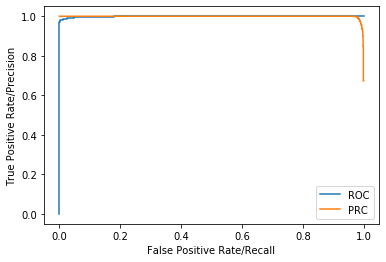

PRC AUC:0.9988705580965681
ROC AUC:0.9986581802368164


In [16]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(dataFeatures)
fpr, tpr, thresholds = roc_curve(dataPhenotypes, probs[:, 1])
prec, recall, thresholds = precision_recall_curve(dataPhenotypes, probs[:, 1])

plt.plot(fpr,tpr,label="ROC")
plt.plot(recall,prec,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.show()

print("PRC AUC:" + str(auc(recall, prec)))
print("ROC AUC:" + str(auc(fpr, tpr)))


### Auxilliary scikit-eLCS methods
In addition to the standard sklearn methods you can use to access training metrics, scikit-eLCS provides a few of its own.

| Method Name | Description |
| :--- | :--- |
| model.get_final_accuracy() | Evaluates (in real time) the final training accuracy of the model |
| model.get_final_instance_coverage() | Evaluates (in real time) the final instance coverage of the model |
| model.get_final_attribute_specificity_list() | Returns a list of attribute specificities (which attributes are specified the most in the rule population) |
| model.get_final_attribute_accuracy_list() | Returns a list of attribute specificities weighted by accuracy |

In [17]:
print("Final Training Accuracy: "+str(trainedModel.get_final_accuracy()))
print("Final Instance Coverage: "+str(trainedModel.get_final_instance_coverage()))
print("Final Attribute Specificity List: "+str(trainedModel.get_final_attribute_specificity_list()))
print("Final Attribute Accuracy List: "+str(trainedModel.get_final_attribute_accuracy_list()))

Final Training Accuracy: 0.986328125
Final Instance Coverage: 1.0
Final Attribute Specificity List: [732, 762, 681, 308, 383, 285, 316, 316, 271, 377, 360]
Final Attribute Accuracy List: [652.3798802666671, 681.7767569636318, 606.3049177731073, 266.2644072668205, 332.2850891744967, 245.72405710441487, 272.88511131387446, 267.99378067481723, 232.24618659674886, 316.3131992292983, 310.4305863312528]


## Part 4: Data Collection and Export

### track_accuracy_while_fit and other tracking metrics
As mentioned in Part 2, there exists the parameter **track_accuracy_while_fit** that determines whether the approximate accuracy of the model is computed during training or not. The benefit to doing this during training is that you will be able to collect data on how accuracy of the model changes over many iterations. The downside to tracking approximate accuracy during training is that evaluation always slows down the training process (but by a relatively small amount). Approximate accuracy is computed via a 50 iteration moving average of prediction accuracies. At each iteration, if **track_accuracy_while_fit** is true, eLCS will make a prediction of the current instance's class. The correctness of this prediction is factored into the moving average.

In addition to tracking approximate accuracy, scikit-eLCS also tracks a series of other training statistics that may be of use. Aside from average rule population generality (which is tracked at least once an epoch), these following statistics are tracked every iteration:
<ul>
    <li>Average rule population generality (average percentage of rule that is generalized)</li>
    <li>Macropopulation size</li>
    <li>Micropopulation size</li>
    <li>Match set size</li>
    <li>Correct set size</li>
    <li>Average iteration age of classifiers in correct set</li>
    <li>Number of classifiers subsumed in iteration</li>
    <li>Number of crossover operations performed in iteration (GA operation)</li>
    <li>Number of mutation operations performed in iteration (GA operation)</li>
    <li>Number of covering operations performed in iteration</li>
    <li>Number of macroclassifiers deleted in iteration</li>
    <li>Total training time</li>
    <li>Total matching time</li>
    <li>Total deletion time</li>
    <li>Total subsumption time</li>
    <li>Total selection time</li>
    <li>Total evaluation time</li>
</ul>

These statistics are not time intensive to compute, and thus can be tracked every iteration. 

Why is collecting this kind of iteration by iteration data important? Unlike many other machine learning models, as the eLCS trains, it is easy to visualize its training process, such as how its accuracy or its macropopulation size changes over time. Thus, doing iteration tracking will allow you to export this training progess data (as you will see below) to aid in this visualization. Also, LCSs are stochastic algorithms with no clear stop criteria, so tracking these metrics will allow you to identify when training has stagnated, which can help in future hyperparameter optimization.

### Exporting and Accessing Iteration Tracking Data
To access this iteration tracking data, you can call the following method that exports the entire tracking data record from training into a local folder:

| Method Name | Description |
| :--- | :--- |
| model.export_iteration_tracking_data(filename) | Exports all tracked data from training |

The filename paramater is optional. By default, the program saves a CSV file named **iterationData.csv** into your local directory. However, you can set the filename param as an absolute path with the format **/filepath/filename.csv** which will save the data into any specified directory.

In [18]:
trainedModel.export_iteration_tracking_data("defaultExportDir/iterationData.csv")

The exported CSV is below:

In [19]:
iterationData = pd.read_csv("defaultExportDir/iterationData.csv")
display(iterationData)

,Iteration,Accuracy (approx),Average Population Generality,Macropopulation Size,Micropopulation Size,Match Set Size,Correct Set Size,Average Iteration Age of Correct Set Classifiers,# Classifiers Subsumed in Iteration,# Crossover Operations Performed in Iteration,# Mutation Operations Performed in Iteration,# Covering Operations Performed in Iteration,# Deletion Operations Performed in Iteration,Total Global Time,Total Matching Time,Total Deletion Time,Total Subsumption Time,Total Selection Time,Total Evaluation Time
0,0,1.000000,0.000000,1,1,1,1,0.000000,0,0,0,1,0,0.066966,0.000003,0.000002,0.000000,0.000000,0.000090
1,1,1.000000,0.000000,2,2,1,1,1.000000,0,0,0,1,0,0.067052,0.000007,0.000002,0.000000,0.000000,0.000138
2,2,1.000000,0.000000,2,2,1,1,1.000000,0,0,0,0,0,0.067118,0.000012,0.000002,0.000000,0.000000,0.000178
3,3,1.000000,0.000000,3,3,1,1,3.000000,0,0,0,1,0,0.067195,0.000016,0.000003,0.000000,0.000000,0.000218
4,4,1.000000,0.000000,4,4,1,1,4.000000,0,0,0,1,0,0.067275,0.000022,0.000004,0.000000,0.000000,0.000262
5,5,0.833333,0.000000,5,5,3,1,5.000000,0,0,0,1,0,0.067364,0.000031,0.000005,0.000000,0.000000,0.000305
6,6,0.857143,0.000000,6,6,1,1,6.000000,0,0,0,1,0,0.067443,0.000037,0.000006,0.000000,0.000000,0.000344
7,7,0.875000,0.000000,7,7,1,1,7.000000,0,0,0,1,0,0.067521,0.000047,0.000007,0.000000,0.000000,0.000383
8,8,0.777778,0.000000,8,8,2,1,8.000000,0,0,0,1,0,0.067639,0.000059,0.000008,0.000000,0.000000,0.000423
9,9,0.800000,0.000000,9,9,1,1,9.000000,0,0,0,1,0,0.067722,0.000071,0.000009,0.000000,0.000000,0.000480


Once the data is exported to a CSV, you can plot trendlines for each statistic. We will use pandas and matplotlib as a demo below. Please note that for the average accuracy and average generality graphs, the first number of iterations is not as "accurate" as the rest of the iterations. The average accuracy moving average only begins moving at iteration 50, and average generality is not tracked until a few hundred iterations in.

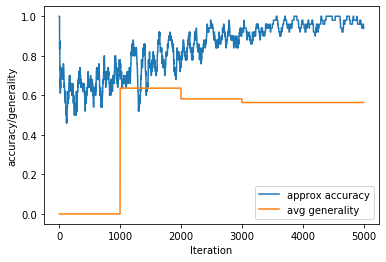

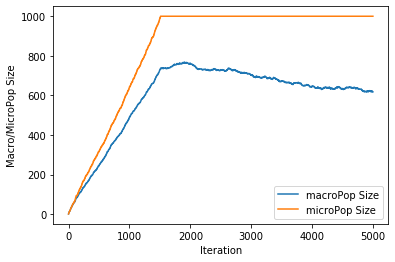

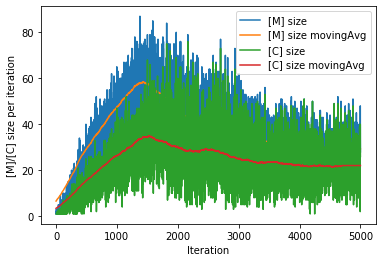

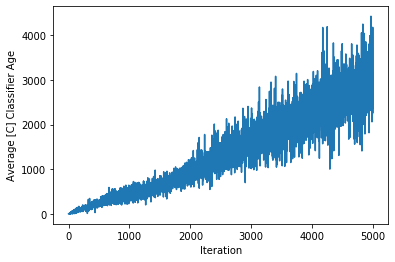

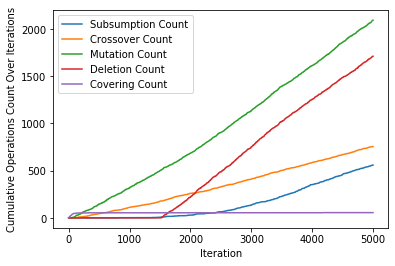

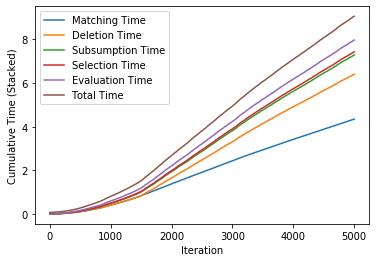

In [20]:
import matplotlib.pyplot as plt

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("defaultExportDir/iterationData.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
cSize = dataTracking["Correct Set Size"].values
experience = dataTracking["Average Iteration Age of Correct Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,cSize,label="[C] size")
plt.plot(iterations,movingAvg(cSize),label="[C] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[C] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [C] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="Selection Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()



### Exporting and Accessing Rule Population Data
Post-training, you also have the option to export the final rule population. This can be done be calling the following method:

| Method Name | Description |
| :--- | :--- |
| model.export_final_rule_population(headerNames,classLabel,filename,DCAL) | Exports the entire final rule population |

The headerNames and classLabel params are optional. If they are not provided, default header and class names will be populated. But they make the exported csv more descriptive.

The filename param is also optional. By default, the program saves a CSV file named **populationData.csv** into your local directory. However, you can set the filename param as an absolute path with the format **/filepath/filename.csv** which will save the data into any specified directory.

The DCAL (Discrete-Continuous Attribute List) boolean param is also optional. By default, the program saves a CSV in DCAL representation form. However, if DCAL is set as False, the program saves a CSV in traditional form.

In [21]:
trainedModel.export_final_rule_population(headers,classLabel,filename="defaultExportDir/fileRulePopulation.csv",DCAL=False)

populationData2 = pd.read_csv("defaultExportDir/fileRulePopulation.csv")
display(populationData2)

,A_0,A_1,A_2,R_0,R_1,R_2,R_3,R_4,R_5,R_6,...,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,1.0,#,1.0,#,0.0,1.0,1.0,#,#,#,...,0.222290,0.740260,1,57.824148,4984,19,0.545455,0.000850,57,77
1,1.0,0.0,0.0,#,#,#,1.0,0.0,0.0,#,...,1.000000,1.000000,2,49.788194,4982,28,0.545455,0.001464,81,81
2,#,#,1.0,1.0,#,1.0,#,0.0,1.0,0.0,...,0.076192,0.597561,1,45.468945,4918,60,0.545455,0.000669,49,82
3,1.0,0.0,#,0.0,1.0,#,1.0,#,1.0,#,...,0.269329,0.769231,1,48.094178,4904,62,0.636364,0.000707,30,39
4,1.0,1.0,1.0,0.0,#,#,#,0.0,#,#,...,1.000000,1.000000,2,62.027276,4931,105,0.545455,0.001824,80,80
5,0.0,1.0,0.0,0.0,#,1.0,#,#,#,#,...,1.000000,1.000000,1,50.086883,4868,125,0.545455,0.000737,74,74
6,#,0.0,1.0,#,1.0,#,#,#,#,#,...,0.235976,0.749158,2,52.588666,4968,183,0.272727,0.001547,445,594
7,#,1.0,#,1.0,1.0,1.0,#,1.0,#,#,...,0.232078,0.746667,1,57.379189,4970,257,0.545455,0.000844,56,75
8,#,0.0,#,#,#,0.0,#,0.0,0.0,#,...,0.228005,0.744027,1,37.165855,4973,265,0.363636,0.000547,218,293
9,#,#,1.0,#,1.0,#,#,#,#,1.0,...,0.091459,0.619792,1,54.730253,4944,298,0.272727,0.000805,357,576


And the above final rule population exported in DCAL format:

In [22]:
trainedModel.export_final_rule_population(headers,classLabel,filename="defaultExportDir/popData2.csv")

populationData2 = pd.read_csv("defaultExportDir/popData2.csv")
display(populationData2)

,Specified Values,Specified Attribute Names,class,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,"1.0, 1.0, 0.0, 1.0, 1.0, 1.0","A_0, A_2, R_1, R_2, R_3, R_7",1.0,0.222290,0.740260,1,57.824148,4984,19,0.545455,0.000850,57,77
1,"1.0, 0.0, 0.0, 1.0, 0.0, 0.0","A_0, A_1, A_2, R_3, R_4, R_5",0.0,1.000000,1.000000,2,49.788194,4982,28,0.545455,0.001464,81,81
2,"1.0, 1.0, 1.0, 0.0, 1.0, 0.0","A_2, R_0, R_2, R_4, R_5, R_6",1.0,0.076192,0.597561,1,45.468945,4918,60,0.545455,0.000669,49,82
3,"1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0","A_0, A_1, R_0, R_1, R_3, R_5, R_7",1.0,0.269329,0.769231,1,48.094178,4904,62,0.636364,0.000707,30,39
4,"1.0, 1.0, 1.0, 0.0, 0.0, 0.0","A_0, A_1, A_2, R_0, R_4, R_7",0.0,1.000000,1.000000,2,62.027276,4931,105,0.545455,0.001824,80,80
5,"0.0, 1.0, 0.0, 0.0, 1.0, 1.0","A_0, A_1, A_2, R_0, R_2, R_7",1.0,1.000000,1.000000,1,50.086883,4868,125,0.545455,0.000737,74,74
6,"0.0, 1.0, 1.0","A_1, A_2, R_1",1.0,0.235976,0.749158,2,52.588666,4968,183,0.272727,0.001547,445,594
7,"1.0, 1.0, 1.0, 1.0, 1.0, 1.0","A_1, R_0, R_1, R_2, R_4, R_7",1.0,0.232078,0.746667,1,57.379189,4970,257,0.545455,0.000844,56,75
8,"0.0, 0.0, 0.0, 0.0","A_1, R_2, R_4, R_5",0.0,0.228005,0.744027,1,37.165855,4973,265,0.363636,0.000547,218,293
9,"1.0, 1.0, 1.0","A_2, R_1, R_6",1.0,0.091459,0.619792,1,54.730253,4944,298,0.272727,0.000805,357,576


## Part 5: Population Reboot
The final feature to introduce is the ability to "reboot" past rule populations. In some cases, you might want to run training, pause training, and resume training at some point in the future. Alternatively, you might want to train the generated rule population on new datasets or with different hyperparameters. The population reboot feature allows you to "save" the current rule population into a txt file for future use. You can later initialize a new eLCS estimator with this txt file. When you run fit, the new eLCS estimator will effectively start off where the saved model left off, beginning with the saved rule population, as well as starting at the next sequential learning iteration and adding to the last model's training times. A demo of this is shown below.

In [23]:
converter = StringEnumerator("test/DataSets/Real/Multiplexer11.csv","class")
headers,classLabel,dataFeatures,dataPhenotypes = converter.get_params()

#Run 1
model = eLCS(learning_iterations=1000)
model.fit(dataFeatures,dataPhenotypes)
print(model.score(dataFeatures,dataPhenotypes))
model.pickle_model("defaultExportDir/savedModel1")

#Run 2 w/ rebooted first model
model2 = eLCS(learning_iterations=1000,reboot_filename="defaultExportDir/savedModel1")
print(model2.score(dataFeatures,dataPhenotypes))
model2.fit(dataFeatures,dataPhenotypes)
print(model2.score(dataFeatures,dataPhenotypes))
model2.pickle_model("defaultExportDir/savedModel2")

#Run 3 w/ rebooted second model
model3 = eLCS(learning_iterations=1000,reboot_filename="defaultExportDir/savedModel2")
print(model3.score(dataFeatures,dataPhenotypes))
model3.fit(dataFeatures,dataPhenotypes)
print(model3.score(dataFeatures,dataPhenotypes))
model3.pickle_model("defaultExportDir/savedModel3")

#Run 4 w/ rebooted third model
model4 = eLCS(learning_iterations=1000,reboot_filename="defaultExportDir/savedModel3")
print(model4.score(dataFeatures,dataPhenotypes))
model4.fit(dataFeatures,dataPhenotypes)
print(model4.score(dataFeatures,dataPhenotypes))


0.77587890625
0.77587890625
0.86083984375
0.86083984375
0.9453125
0.9453125
0.97705078125


## Conclusion

By now, you should be able to use eLCS deftly, from initialization, to training, to evaluation. Have fun!